In [8]:
###code during lecture here
import pandas as pd

train_data = pd.read_csv("train.csv")
# train_data.head()

test_data = pd.read_csv("test.csv")
#test_data.head()

len(train_data)
#len(test_data)

women = train_data.loc[train_data.Sex == 'female']["Survived"]

#women = train_data.loc[train_data.Sex == 'female']

rate_women = sum(women)/len(women)
#print(rate_women * 100 , '% der Frauen haben überlebt')

men = train_data.loc[train_data.Sex != 'female']["Survived"]
rate_men = sum(men)/len(men)

print(rate_men * 100 , '% der Männer haben überlebt')



























18.890814558058924 % der Männer haben überlebt


In [10]:
from sklearn.ensemble import RandomForestClassifier 

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]


X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])




model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)






In [11]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_today.csv', index=False)

In [2]:
test_data = pd.read_csv("test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
1,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
2,17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
3,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
4,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [12]:
women = train_data.loc[train_data.Sex == "male"]["Survived"]
rate_women = sum(women)/len(women)

print("% of men who survived:", rate_women*100)




% of men who survived: 18.890814558058924


In [13]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)





RandomForestClassifier(max_depth=5, random_state=1)

In [14]:
predictions = model.predict(X_test)


In [15]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':predictions})
output.to_csv('test_prediction.csv', index=False)




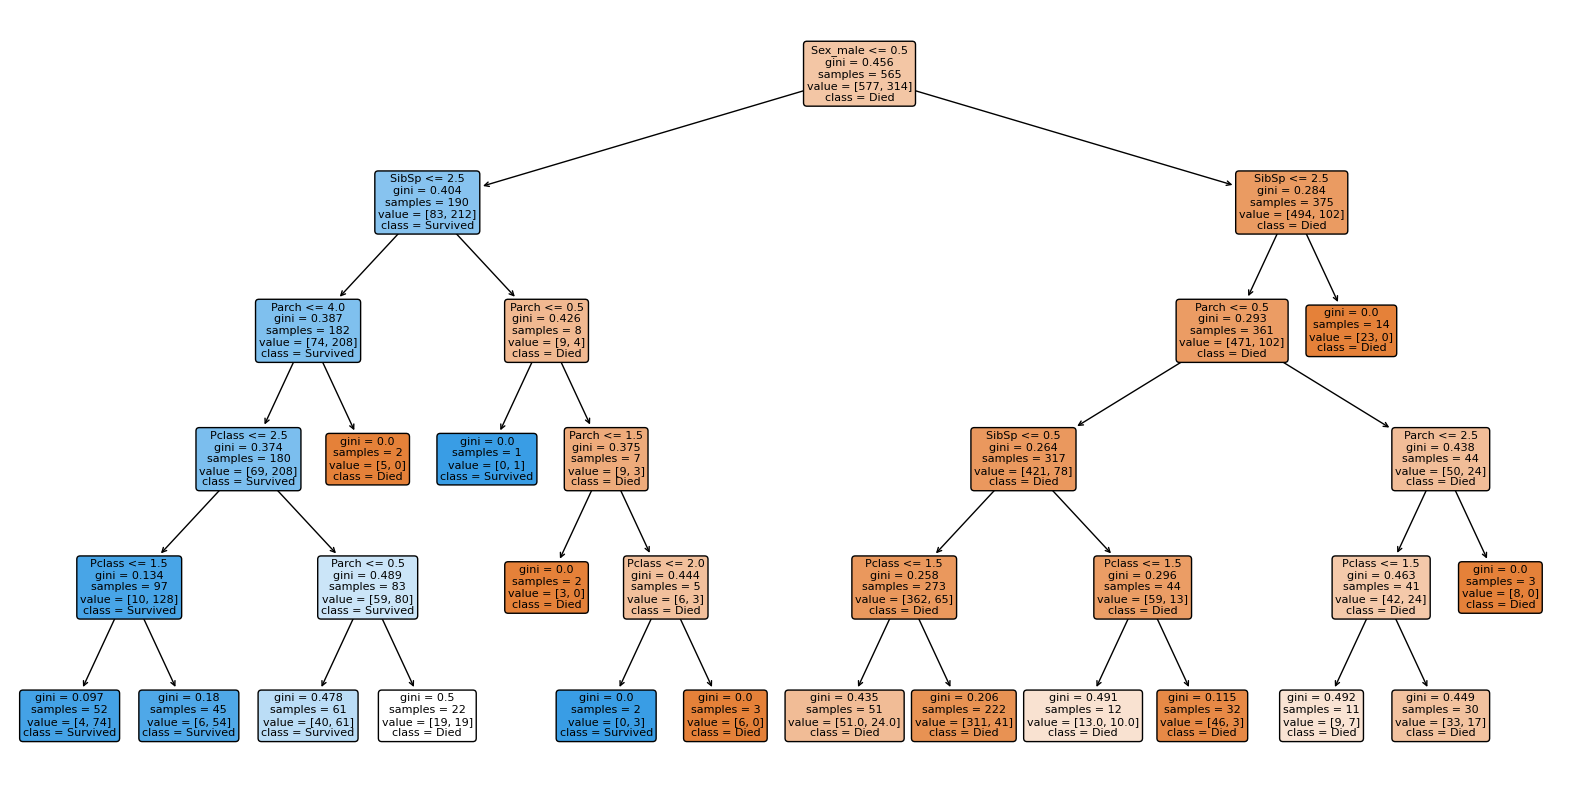

In [16]:
single_tree = model.estimators_[0]
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=["Died", "Survived"], rounded=True)
plt.show()




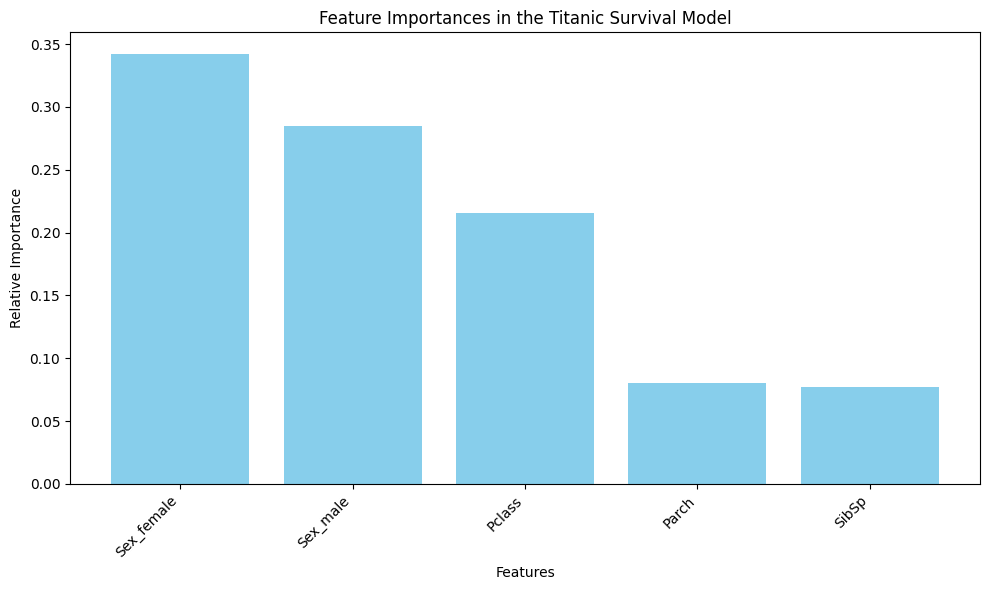

In [8]:
###plots prepared

import numpy as np
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in the Titanic Survival Model')
plt.bar(range(len(indices)), importances[indices], color='skyblue', align='center')

plt.xticks(range(len(indices)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Relative Importance')

plt.tight_layout()
plt.show()


/var/folders/1z/rwqfngf91_s_lnbph6__zp1m0000gn/T/ipykernel_10099/2003645315.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing values


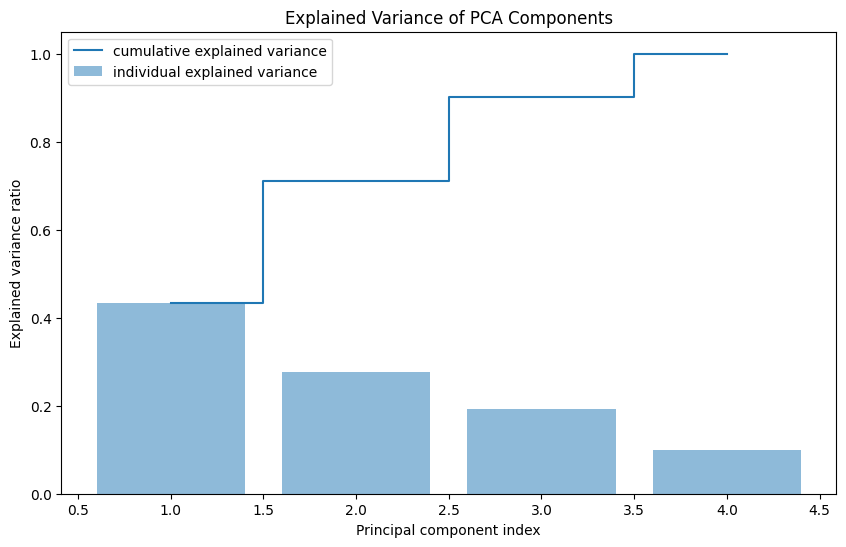

In [10]:
####unsupervised prepared

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded into train_data)
# train_data = pd.read_csv("path_to_train.csv")

# Selecting relevant features and preprocessing
df = train_data[['Sex', 'Fare', 'Pclass', 'Age']].copy()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing values

# Standardizing the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()


# Plotting
plt.figure(figsize=(10, 6))

# Individual explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')

# Cumulative explained variance
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance of PCA Components')
plt.show()


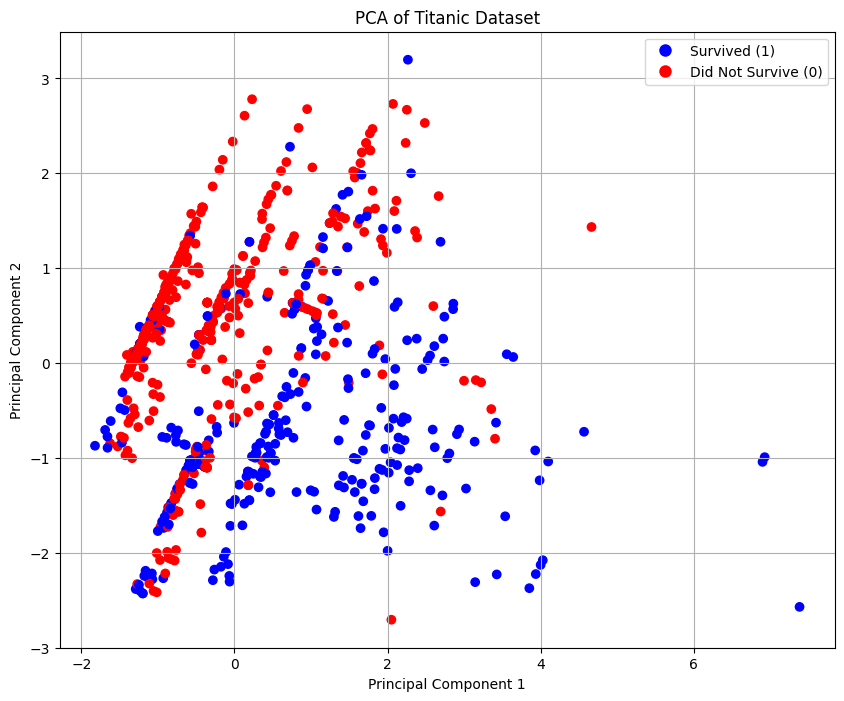

In [12]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(df_scaled)

# Creating a DataFrame with the two principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


df_pca['Survived'] = train_data['Survived']  # Or any other categorical feature of interest

# Plot
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Survived'].apply(lambda x: colors[x]))
plt.title('PCA of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Adding a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Survived (1)', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Did Not Survive (0)', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements, loc='best')

plt.show()

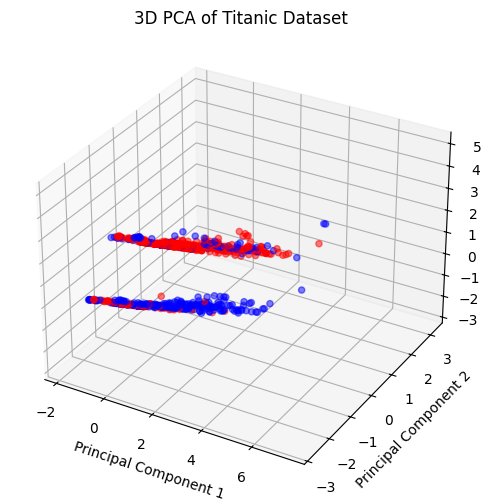

In [11]:
# Applying PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df_scaled)

# Creating a DataFrame with the three principal components
df_pca_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Survived'] = train_data['Survived']  # Add the 'Survived' column for coloring


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Your PCA data
# df_pca_3d ...

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'],
                     c=df_pca_3d['Survived'].apply(lambda x: 'blue' if x == 1 else 'red'),
                     alpha=0.5)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Titanic Dataset')

plt.show()